# K-Nearest Neighbors (KNN)

- Distance based bir algoritmadır.

- Sınıflandırma ve regresyon problemlerinde kullanılabilir.

- Temel Prensibi: Bir veri noktasının sınıfını (veya değerini) belirlerken, veri setindeki diğer noktalara olan "yakınlığını" kullanır.

- Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder.

- KNN hesaplama yöntemleri: 1- Öklit (en çok kullanılan) 2- Manhattan

- Çok güvenilir bir algoritma olmadığından çok kullanılmaz.

- En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz (3-5 gibi)

- Küçükten büyüğe sort eder


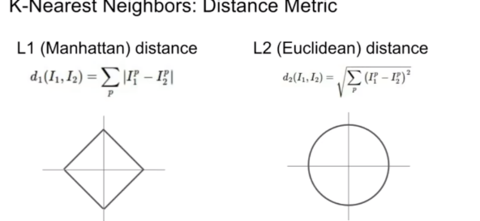

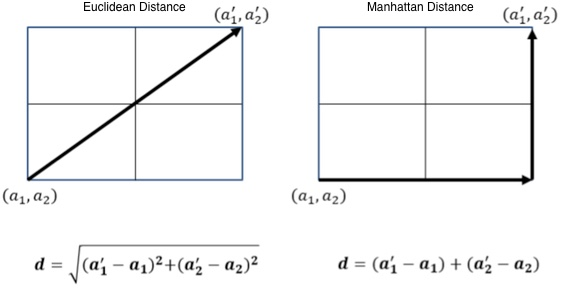

### Çalışma Prensibi

- **K Değerinin Belirlenmesi:** K, algoritmanın bir veri noktası için dikkate alacağı en yakın komşu sayısını belirtir. K'nin değeri, problemin özelliklerine ve veri setinin büyüklüğüne göre değişkenlik gösterebilir.

- **Mesafe Hesaplama:** Bir veri noktasının sınıfını tahmin ederken, KNN öncelikle bu noktanın, veri setindeki diğer tüm noktalara olan mesafesini hesaplar. Bu mesafe genellikle Öklid mesafesi olarak hesaplanır, ancak farklı mesafe ölçütleri de kullanılabilir.

- **En Yakın K Komşunun Seçilmesi:** Hesaplanan mesafelere göre en yakın K komşu belirlenir. Yani, incelenen noktaya en yakın olan K adet nokta seçilir.

- **Sınıflandırma veya Regresyon:**

  Sınıflandırma için: Seçilen K komşunun çoğunluk sınıfına göre bir sınıf tahsisi yapılır. Yani, K komşu içinde en çok hangi sınıftan varsa, incelenen nokta da o sınıfa atanır.
   
  Regresyon için: Seçilen K komşuların değerlerinin ortalaması (veya medyanı) alınarak bir tahminde bulunulur.

### Özellikleri

- **Parametrik Olmayan Yöntem:** KNN, modelin formunu önceden belirlemeyen parametrik olmayan bir yöntemdir. Bu, modelin veriye göre şekillendiği anlamına gelir.

- **Basitlik ve Anlaşılabilirlik:** KNN'nin anlaşılması ve uygulanması nispeten kolaydır.

- **Esneklik:** Hem sınıflandırma hem de regresyon problemlerinde kullanılabilir.

- **Lazy Learning (Tembel Öğrenme):** KNN, tembel bir öğrenme algoritmasıdır; yani eğitim aşamasında bir model oluşturmaz, ancak tahmin yapılırken veri setini kullanır.

### Dezavantajları

- **Ölçeklenebilirlik:** Büyük veri setlerinde, her bir tahmin için tüm veri seti üzerinden mesafe hesaplaması yapılması gerektiğinden, KNN yavaşlayabilir.

- **Yüksek Boyutlu Veriler:** "Boyut laneti" nedeniyle, yüksek boyutlu verilerde mesafe ölçümleri az farklılık gösterir ve bu da performansı olumsuz etkileyebilir.

- **Dengesiz Veri Setleri:** Eğer sınıflardan biri diğerlerine göre çok daha fazla örneğe sahipse, azınlık sınıfının etkisi göz ardı edilebilir.

Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor

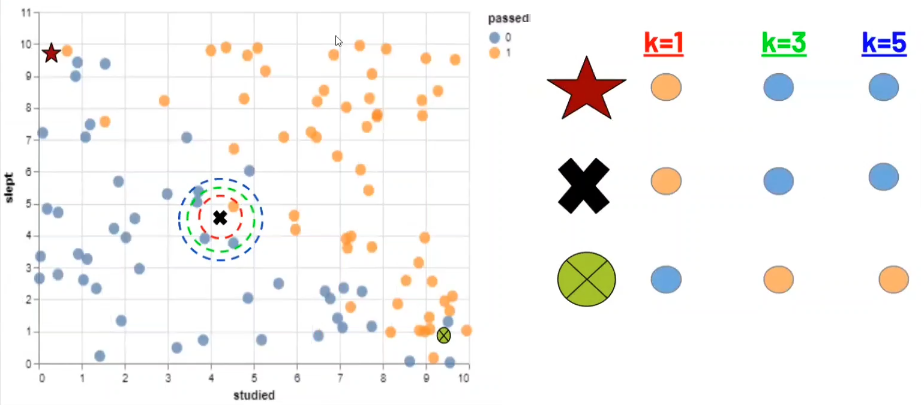

- Eğer "K" değeri çok büyükse, model veri setinin genel yapısını fazla genelleştirir ve aşırı basitleştirme (underfitting) meydana gelebilir. Bu, modelin karmaşıklığının azalması ve bireysel veri noktalarının özelliklerinin göz ardı edilmesi anlamına gelir.

- "K" değeri çok küçükse (örneğin 1), model veri üzerinde aşırı uyuma (overfitting) eğiliminde olur, yani gürültülü verilere veya aykırı değerlere fazla duyarlı hale gelir.

- Small k can lead to overfitting, as the model captures too much of the noise in the training data. Large k can lead to underfitting, as the model is too simple and fails to capture the underlying structure of the data.

- A suitable k can be chosen by looking at the performance on a validation set or by using cross-validation techniques.

**Uzaklıklar sınıf içi minimum, sınıflar arası maksimum olmalıdır.**

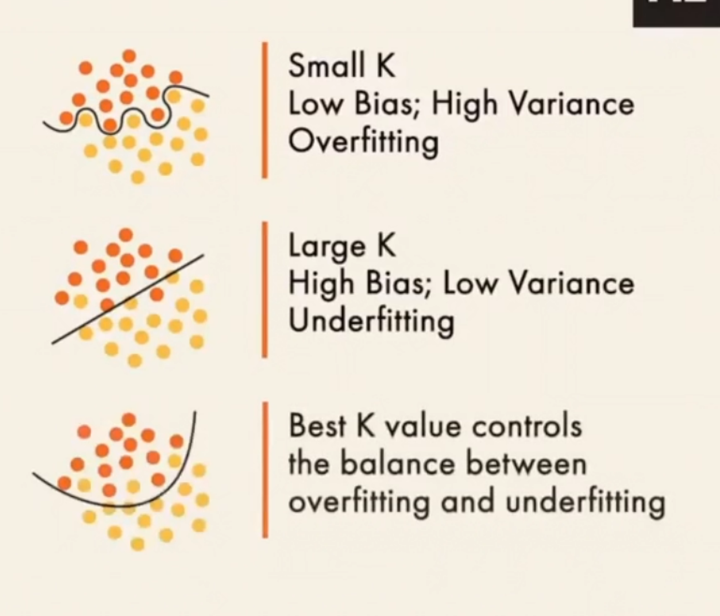

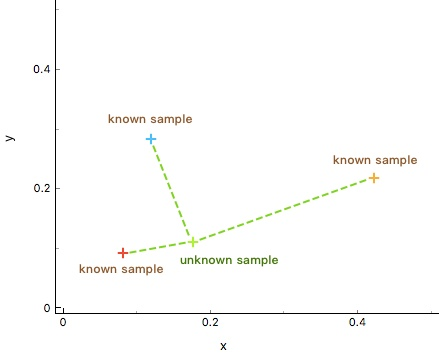

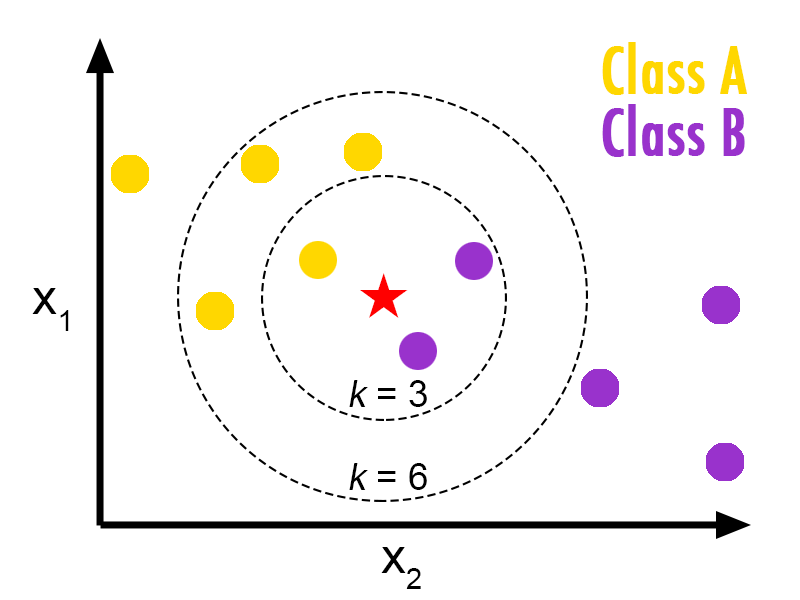

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Cancer Prediction Model

In [2]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [5]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [6]:
df["Cancer Present"].value_counts()

# Balanced

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

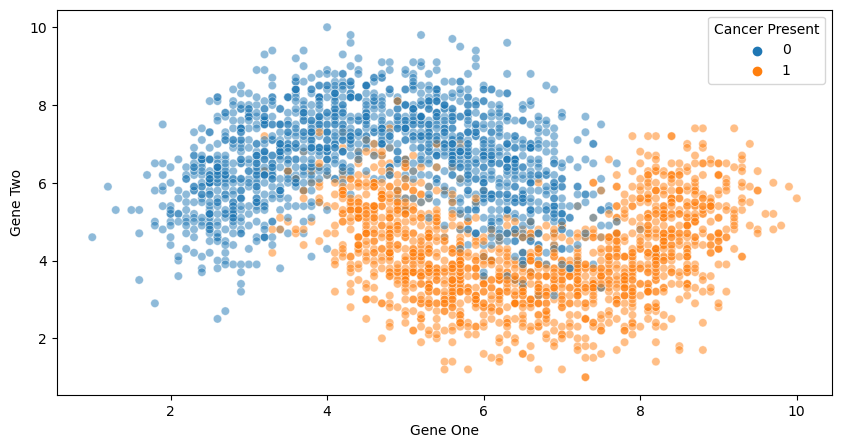

In [7]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.5);

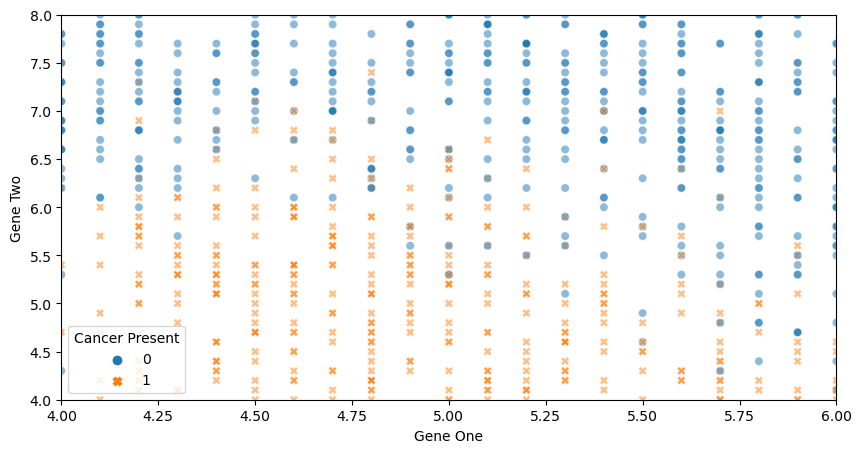

In [8]:
sns.scatterplot(x = "Gene One", y = "Gene Two", 
                hue = "Cancer Present", 
                data = df, alpha = 0.5, 
                style = "Cancer Present")
plt.xlim(4,6)
plt.ylim(4,8);

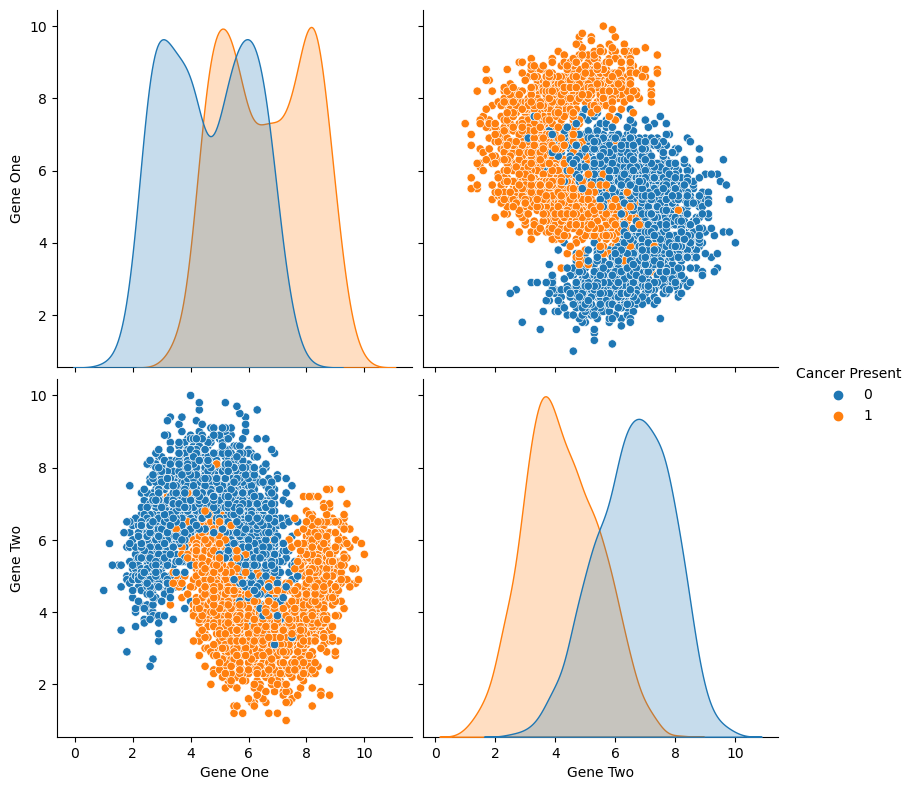

In [9]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

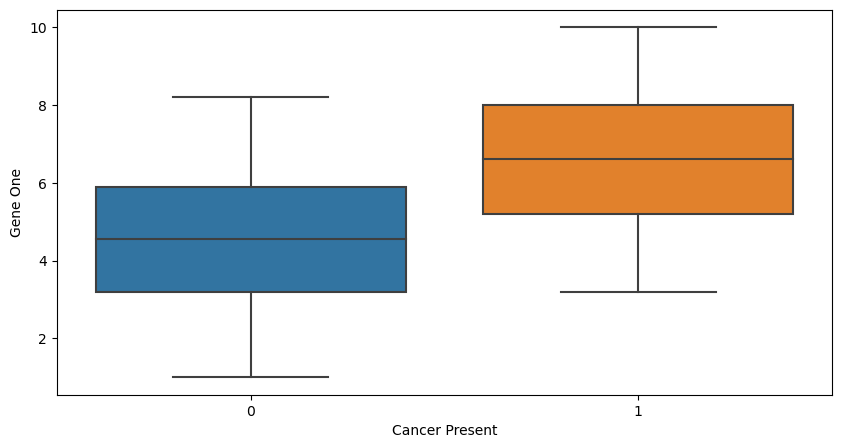

In [10]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df );

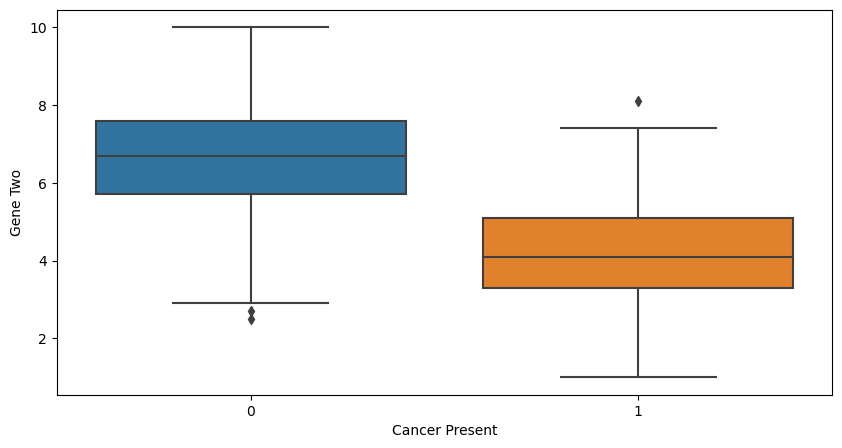

In [11]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df );

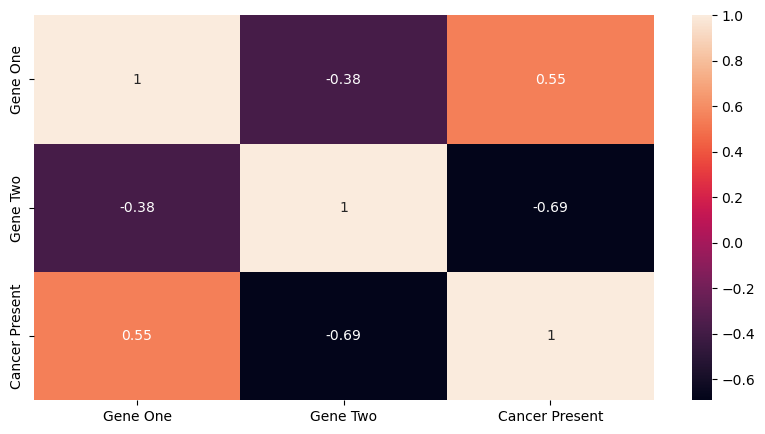

In [12]:
sns.heatmap(df.corr(), annot=True);

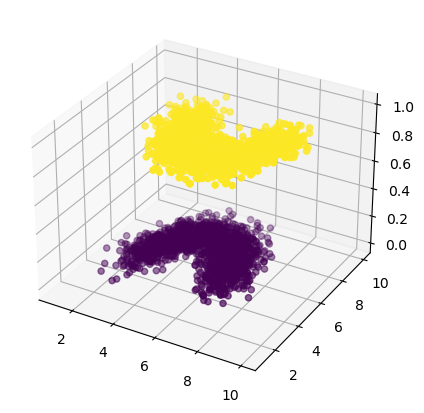

In [13]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

### Train|Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling Data

Veri kümesine ve probleme özgü olarak, deneyerek en uygun scale yöntemini belirlemek faydalı olacaktır.


Verilerin Ölçeği: Featurelerin değer aralıkları önemlidir. Feature'lar arasında büyük değer farklılıkları varsa, Min-Max Ölçeklendirme kullanmak uygun olabilir. Ancak, değerler arasında büyük bir ölçek farkı yoksa, Z-Skor Ölçeklendirme (Standartlaştırma) daha uygun olabilir.

**Örnek:**

Feature 1: 0 ile 100 arasında değerler alır.
Feature 2: -1 ile 1 arasında değerler alır.
Bu durumda, Z-Skor Ölçeklendirme daha uygun olabilir, çünkü Min-Max Ölçeklendirme, feature 1'in ölçeğini daraltarak veri kaybına neden olabilir.

Dağılım ve Aykırı Değerler: Eğer veriler normal bir dağılıma sahipse ve aykırı değerler azsa, Z-Skor Ölçeklendirme (StandardScaler) uygun olabilir. Ancak, verilerin dağılımı dengesiz veya aykırı değerler çok fazlaysa, Min-Max (MinmaxScaler) Ölçeklendirme bu duruma daha iyi uyabilir.

Kategorik Veriler: Eğer verilerde kategorik feature'lar varsa ve sıralama aralığı yoksa, Min-Max (MinmaxScaler) Ölçeklendirme kullanmak anlamlı olmayabilir.

Model Bağımlılığı: Kullanılacak modelin ölçeklendirmeye duyarlılığı da dikkate alınmalıdır. Örneğin, **KNN gibi bir model**, uzaklık hesaplamalarına dayandığından, feature'ların ölçeklendirilmesi bu modele önemli ölçüde etki eder.

Hiperparametre Ayarlaması: Bazı makine öğrenme algoritmaları, feature'ların ölçeklendirilmesine bağlı olarak farklı hiperparametre değerlerine ihtiyaç duyabilir. Bu durumda, farklı ölçeklendirme yöntemlerini deneyerek en iyi sonuçları elde etmek mümkün olabilir.

Sonuç olarak, hangi ölçeklendirme yönteminin kullanılacağı veri kümesinin **doğasına, feature'ların dağılımına, kullanılacak modelin feature'larına ve hiperparametre ayarlamalarına** bağlıdır.

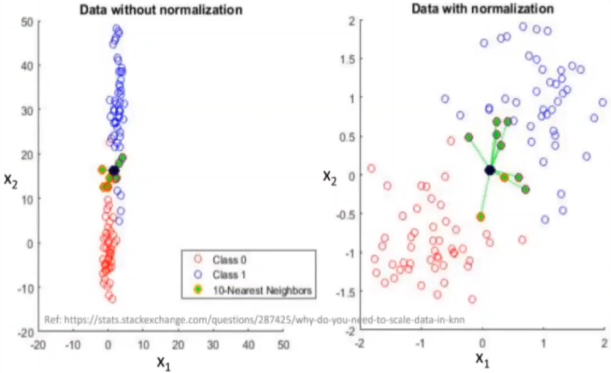

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [19]:
from sklearn.neighbors import KNeighborsClassifier

### K-Nearest Neighbor (KNN) Algoritmasının Parametreleri

KNN algoritması, bir dizi parametre ile yapılandırılabilir. Bu parametreler, modelin performansını ve doğruluğunu etkileyebilir.

#### Parametrelerin Açıklamaları

1. **n_neighbors**: 
   - K komşuların sayısı.
   - Yeni bir veri noktasını sınıflandırmak veya tahmin etmek için kullanılacak komşu sayısını belirler.
   - Uygun bir değerle ayarlamak, modelin başarısını etkileyebilir.
   - Genellikle tek ve küçük bir değer tercih edilir.

2. **weights**:
   - Komşuların katkısını belirleyen ağırlıklandırma yöntemi.
   - `"uniform"`: Her komşunun eşit ağırlıkta olması.
   - `"distance"`: Komşuların uzaklıklarına göre ağırlıklandırılması.

3. **algorithm**:
   - Komşuların aranma yöntemini belirler.
   - Seçenekler: `"auto"`, `"ball_tree"`, `"kd_tree"`, `"brute"`.
   - `"auto"`: Veri setine göre en uygun algoritmayı otomatik seçer.
   - `"ball_tree"` ve `"kd_tree"`: Hızlı komşu arama için.
   - `"brute"`: Tüm veri noktalarını karşılaştırarak arama yapar.

4. **leaf_size**:
   - `"ball_tree"` veya `"kd_tree"` algoritmalarında yaprak düğümlerinin boyutunu belirler.
   - Daha büyük yaprak boyutu, hafızada daha az yer tutabilir, ancak arama yavaş olabilir.

5. **p**:
   - Uzaklık metriğinin türünü belirler.
   - `p = 1`: Manhattan uzaklığı.
   - `p = 2`: Euclidean uzaklığı.

6. **metric**:
   - Uzaklık metriğini tanımlar.
   - Varsayılan olarak `"minkowski"`, `p` parametresine bağlı olarak Manhattan veya Euclidean uzaklığını temsil eder.
   - Diğer seçenekler: `"manhattan"`, `"euclidean"`, `"cosine"` vb.

7. **metric_params**:
   - Uzaklık metriği için ekstra parametreler sağlar.

8. **n_jobs**:
   - Komşu arama işlemini paralel yapmak için kullanılır.
   - `n_jobs = -1`: Tüm işlemci çekirdeklerini kullanır.

Bu parametrelerin doğru ayarlanması, KNN modelinin performansını ve doğruluğunu önemli ölçüde etkileyebilir.


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [21]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [23]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [24]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [25]:
#!pip install mglearn

In [26]:
import mglearn

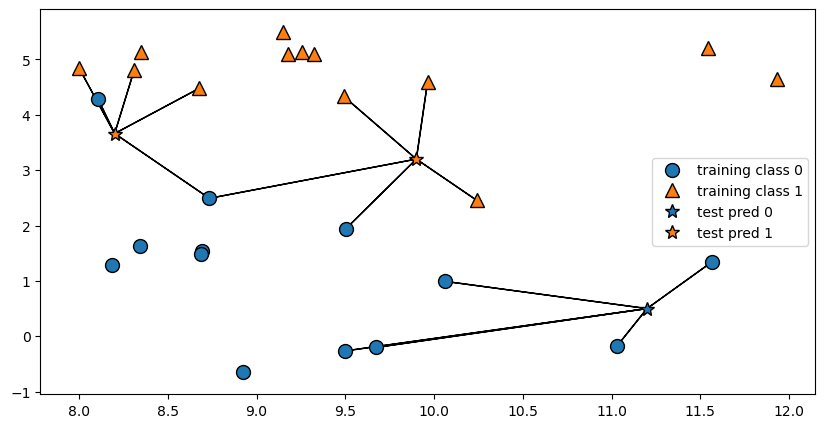

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)

In [28]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [29]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2846,0,0,0.0,1.0
2425,0,0,0.2,0.8
1399,1,1,1.0,0.0
309,0,0,0.0,1.0
2708,0,1,0.8,0.2
1665,0,0,0.0,1.0
261,1,1,0.8,0.2
2163,0,0,0.0,1.0
839,1,1,1.0,0.0
1089,0,0,0.0,1.0


## Model Performance on Classfication Task

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [31]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

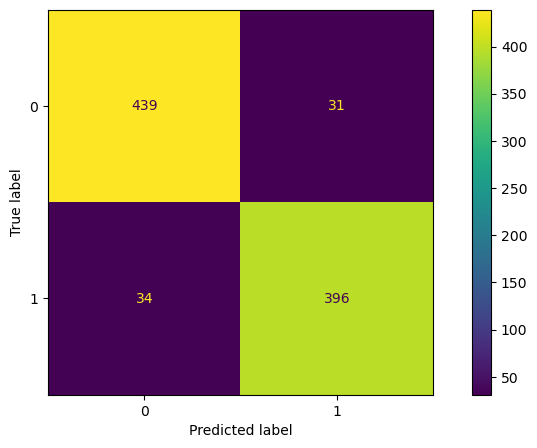

In [32]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test);

stratify=y ile alınan sonuç
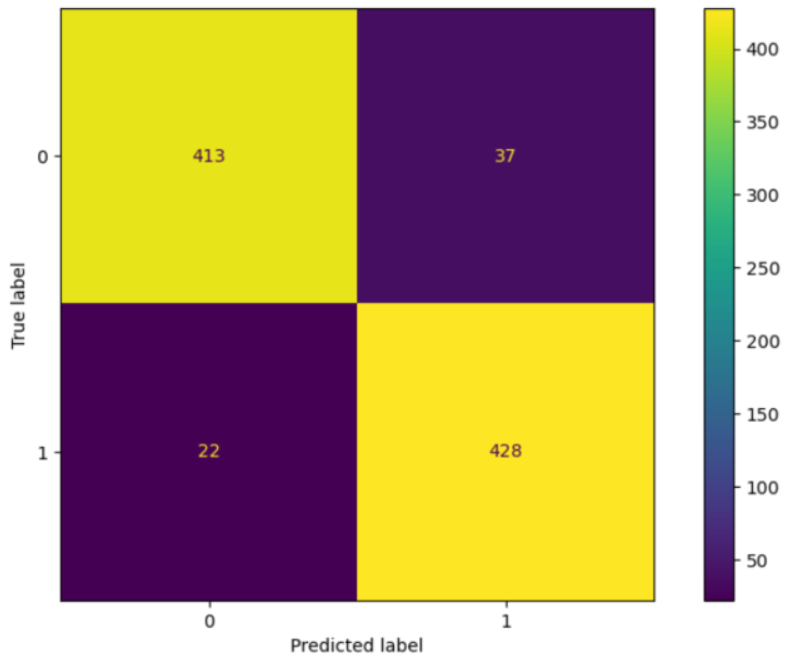

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values

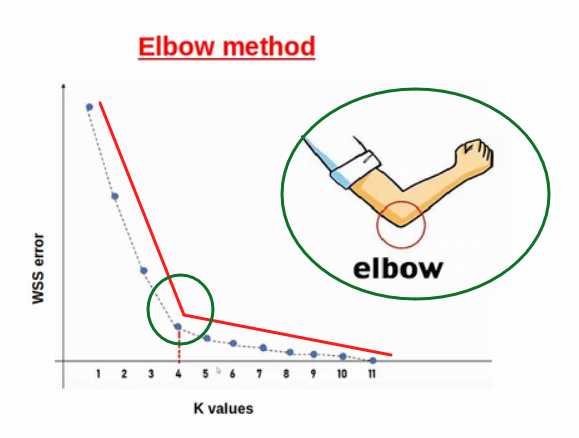

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [35]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

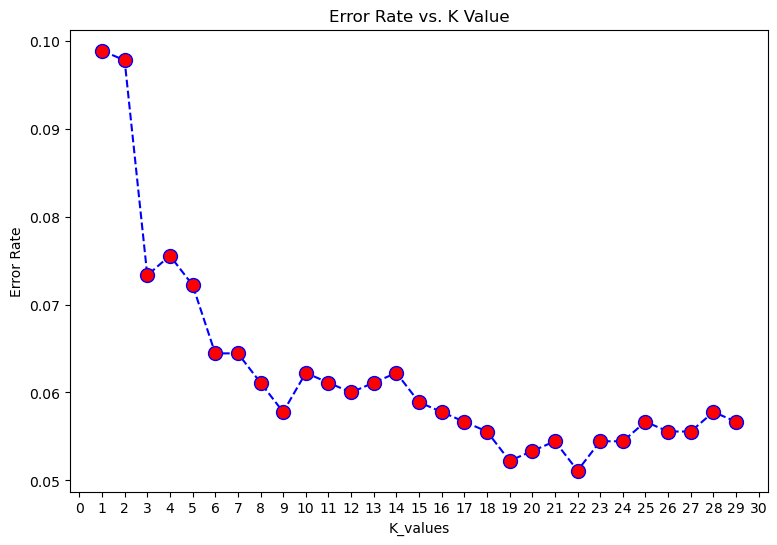

In [36]:
plt.figure(figsize=(9,6))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

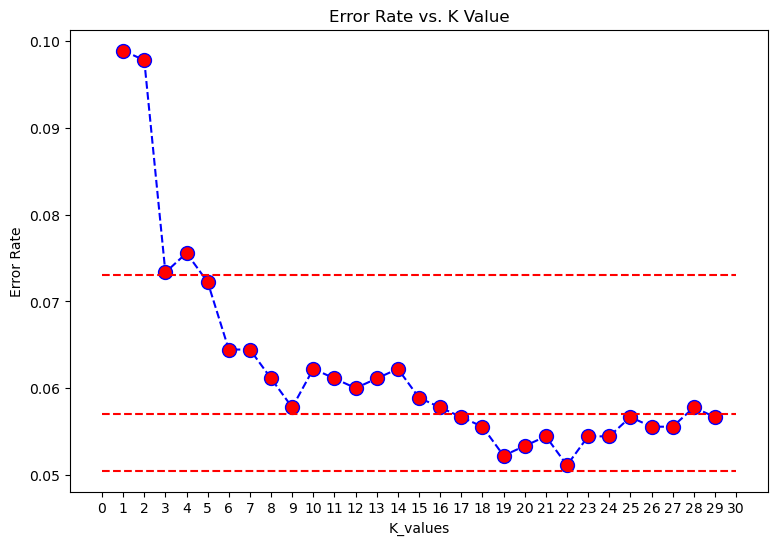

In [37]:
plt.figure(figsize=(9,6))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.073, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0505, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

plt.xticks(range(0, 31, 1));

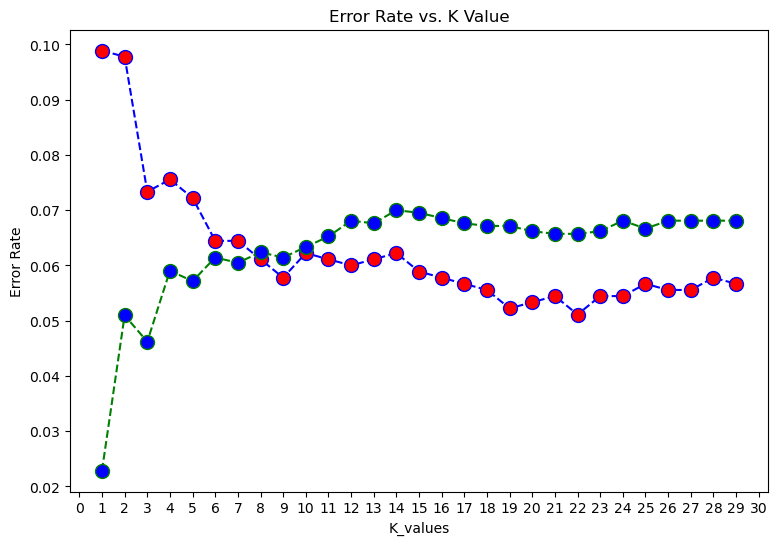

In [38]:
plt.figure(figsize=(9,6))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.xticks(range(0, 31, 1));

## Scores by Various K Values

In [39]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)
print("WITH K=1\n")

eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [41]:
k_list = [3, 6, 9, 16, 21, 22, 23]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled,y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set

[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set

[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

WITH K=6

Test_Set

[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   

## CV for Optimal K Value

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate

In [43]:
model = KNeighborsClassifier(n_neighbors= 21)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv=10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000998,0.005344,0.933333,0.942857,0.925234,0.933962
2,0.012876,0.019149,0.957143,0.945455,0.971963,0.958525
3,0.000961,0.015625,0.952381,0.970874,0.934579,0.952381
4,0.001024,0.011968,0.866667,0.855856,0.887850,0.871560
5,0.000869,0.012098,0.947619,0.944444,0.953271,0.948837
6,0.001997,0.016597,0.914286,0.908257,0.925234,0.916667
7,0.002155,0.016435,0.933333,0.926606,0.943925,0.935185
8,0.002112,0.015217,0.938095,0.935185,0.943925,0.939535
9,0.001006,0.029435,0.952381,0.980198,0.925234,0.951923
10,0.002171,0.018786,0.909524,0.885965,0.943925,0.914027


In [44]:
df_scores.mean()[2:]

test_accuracy     0.930476
test_precision    0.929570
test_recall       0.935514
test_f1           0.932260
dtype: float64

## Gridsearch Method for Chosing Reasonable K Value

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
knn_grid = KNeighborsClassifier()

In [47]:
n_neighbors = range(1, 30) # k_values
param_grid = {"n_neighbors":n_neighbors, "p": [1, 2], "weights": ["uniform", "distance"]}

In [48]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = "recall") #Sağlıkla ilgili data seti olduğundan recall baktık

In [49]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [50]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

In [51]:
print("WITH K=21\n")
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluation ROC Curves and AUC

In [52]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 21).fit(X_train_scaled, y_train)

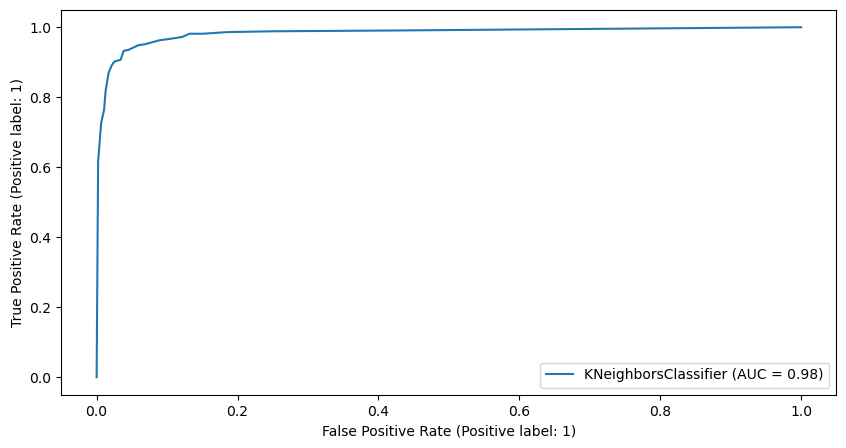

In [54]:
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [55]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9826669965363682

## Final Model and Model Deployment

In [56]:
import pickle

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
X_scaled = scaler.transform(X)

In [60]:
final_knn_model = KNeighborsClassifier(n_neighbors = 21).fit(X_scaled, y)

In [61]:
pickle.dump(scaler, open("scaler_knn.pkl", "wb"))
pickle.dump(final_knn_model, open("final_knn.pkl", "wb"))

# Predict New Observation

In [62]:
loaded_scaler = pickle.load(open("scaler_knn.pkl", "rb"))
loaded_model = pickle.load(open("final_knn.pkl", "rb"))

In [63]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [64]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [65]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [66]:
predictions = loaded_model.predict(samples_scaled)
predict_proba = loaded_model.predict_proba(samples_scaled)

In [67]:
samples["pred"] = predictions
samples["pred_proba_1"] = predict_proba[:, 1]
samples["pred_proba_0"] = predict_proba[:, 0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.047619,0.952381
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.333333,0.666667
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.619048,0.380952
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


# Pipeline 

## Pipeline'ın Avantajları

- **Verimlilik:** Otomatikleştirme sayesinde, bir veri seti üzerinde tekrar tekrar aynı işlemleri manuel olarak yapma gerekliliğini ortadan kaldırır.

- **Tutarlılık:** Veri ön işleme ve modelleme adımlarını standardize eder, böylece farklı veri kümeleri veya model parametreleri ile denemeler yaparken tutarlılık sağlar.

- **Hata Azaltma:** Manuel müdahaleyi azaltarak hataların önüne geçer.

- **Kolaylık:** Model eğitimi, değerlendirme ve iyileştirme süreçlerini kolayca yürütebilmenizi sağlar.

## Çalışma Prensibi

- **Veri Ön İşleme:** Verilerin temizlenmesi, normalleştirilmesi ve uygun formata dönüştürülmesi gibi adımları içerir.
    
- **Feature Çıkarma:** Veriden anlamlı feature'ların çıkarılması işlemidir.

- **Modelleme:** Seçilen algoritma ile modelin eğitilmesi aşamasıdır.

- **Değerlendirme:** Modelin performansının test verisi üzerinde değerlendirilmesi işlemidir.

## İşlem Adımları (Transformers)

- Bu adımlar, veriyi temizlemek, özellikleri dönüştürmek veya özellik seçimi gibi işlemleri içerir.
- Ön işlem adımları, veri kümesinin özelliklerini hazırlamak ve düzenlemek için kullanılır.
- Örnekler: Ölçeklendirme (scaling), kodlama (encoding), Ana Bileşen Analizi (PCA).
- Genellikle `fit_transform` metodunu kullanarak gerçekleştirilir.

## Model (Estimator)

- Bu adım, veri üzerinde bir makine öğrenmesi modelini kurmak ve eğitmek için kullanılır.
- Sınıflandırma, regresyon gibi çeşitli problemler için kullanılan modeller bu adımda yer alır.
- Çeşitli öğrenme algoritmaları ve modeller bu aşamada entegre edilir.


## Tipik Bir Veri Ön İşleme Sıralaması Örneği

Veri ön işleme adımlarının sırası genellikle önemlidir ve belirli işlemlerin diğerlerinden önce yapılmasının nedenleri vardır. İşte bazı genel kurallar ve öneriler:

* **Eksik Değerlerin Doldurulması (Imputation):** Genellikle diğer ön işleme adımlarından önce yapılmalıdır. Eksik verilerin doldurulması, diğer ön işleme adımlarının (örneğin ölçeklendirme veya kodlama) doğru çalışabilmesi için önemlidir, çünkü bu adımlar genellikle eksik değerlerle uyumlu değildir.


* **Ölçeklendirme (Scaling):** Kategorik verilerin kodlanmasından önce yapılması genellikle daha iyidir. Ölçeklendirme, sayısal verilerin birbirleriyle uyumlu olmasını sağlar ve KNN veya SVM gibi mesafe temelli algoritmalar için önemlidir. Ancak, one-hot encoding gibi işlemlerden sonra ölçeklendirme yapmak, ölçeklendirme işleminin anlamını kaybettirebilir, çünkü kodlanmış kategorik veriler genellikle zaten 0 ve 1 arasında değerler alır.


* **Kategorik Verilerin Kodlanması (Encoding):** Özellikle one-hot encoding kullanılıyorsa, eksik değerlerin doldurulmasından ve sayısal verilerin ölçeklendirilmesinden sonra yapılmalıdır. Kategorik verilerin doğru bir şekilde sayısal formata dönüştürülmesi, modelin bu verileri anlamasını sağlar.


* **Boyut İndirgeme (Dimensionality Reduction):** Özellikle PCA gibi yöntemler kullanılıyorsa, verilerin ölçeklendirilmesinden sonra yapılmalıdır. Boyut indirgeme yöntemleri, özellikler arasındaki varyansı dikkate alarak çalışır ve ölçeklendirilmemiş veriler, yanıltıcı sonuçlara yol açabilir.


* **Özellik Seçimi (Feature Selection):** Genellikle veri ön işlemesi tamamlandıktan sonra yapılır. Özellik seçimi, modelin eğitilmesi sırasında kullanılacak en önemli özellikleri belirlemek için kullanılır ve veri setindeki gürültüyü azaltabilir.

## Tipik bir veri ön işleme sıralaması örneği:

1) Eksik Değerlerin Doldurulması

2) Sayısal Verilerin Ölçeklendirilmesi (Scaling)

3) Kategorik Verilerin Kodlanması

4) Boyut İndirgeme

5) Özellik Seçimi

- Her adım, sonraki adım için verileri uygun bir formata getirir, bu yüzden sıralama önemlidir. 
- Ancak, her veri seti ve problem özeldir, bu yüzden en iyi ön işleme akışını belirlemek için verilerinizin doğasını ve seçtiğiniz modelin gereksinimlerini dikkate almalısınız.

In [68]:
from sklearn.pipeline import Pipeline

**1. Steps:**
**Tanım:** steps parametresi, pipeline içerisinde gerçekleştirilecek işlemlerin sıralı bir listesidir. Her bir adım, bir tuple şeklinde tanımlanır

**Örnek Kullanım:** `"steps=[('scaler', StandardScaler()), ('svc', SVC())]"`

**Amaç:** Pipeline içinde veri ön işleme ve model eğitim adımlarını sırayla tanımlamak.

**2. Memory:**

**Tanım:** memory parametresi, pipeline tarafından yapılan hesaplamaların önbelleğe alınması için kullanılır. Bu sayede, aynı veri üzerinde birden çok kez çalıştırılan işlemler için zaman kazanılabilir.

**Örnek Kullanım:** `memory=joblib.Memory(cachedir='/path/to/cache')`

**Amaç:** Özellikle büyük veri setleri üzerinde çalışırken hesaplama süresinden tasarruf sağlamak. Eğer bir önbellek yolu (cachedir) belirtilirse, pipeline adımlarının çıktıları bu yola kaydedilir ve tekrar kullanılabilir.

**3. Verbose:**

**Tanım:** verbose parametresi, pipeline'ın çalışma esnasında bilgilendirme mesajlarının detay düzeyini belirler. Daha yüksek bir değer, daha fazla mesajın görüntülenmesi anlamına gelir.

**Örnek Kullanım:** `verbose=1`

**Amaç:** Eğitim süreci sırasında ne olduğunu daha iyi anlamak için ek bilgiler sağlamak. verbose değeri arttıkça, pipeline içindeki adımların başlangıç ve bitiş zamanları gibi daha fazla ayrıntı log olarak çıktı verilir.

In [69]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [70]:
Pipeline(steps = steps)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [71]:
pipe_model = Pipeline(steps=steps)

In [72]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [73]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [74]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

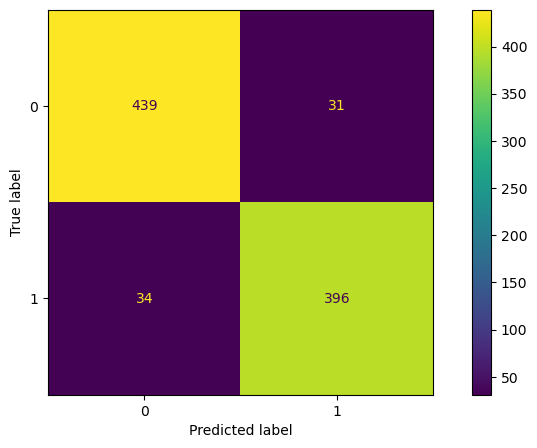

In [75]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [77]:
pipe_model.get_params()

# Model'de geçerli olan parametleri döndürür

{'memory': None,
 'steps': [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [78]:
pipe_model.set_params(knn__n_neighbors = 21)

# Model'de geçerli olan bir parametreyi yeniden tanımlamamızı sağlar

Pipeline(steps=[('Scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [79]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=21))],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=21),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## GridSearch on Pipeline